# <font color='CC3D3D'> Feature Generation2
    
### 1. Featrue Generation
- 나눠진 데이터 <span style="color:green">**X_train.csv, X_public.csv, X_private.csv, X_test.csv** </span>를 가지고 Bank와 Product에 Featrue 생성
    
### 2. Deployment CSV
- 만들어진 Feature Data를 <span style="color:blue">**bank_df.csv, product_df.csv** </span>로 생성

# Import

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LogisticRegression

# Data Load

In [2]:
x_train = pd.read_csv('../Data/X_train.csv')
x_public = pd.read_csv('../Data/X_public.csv')
x_private = pd.read_csv('../Data/X_private.csv')
test_data = pd.read_csv('../Data/X_test.csv')

In [3]:
train = pd.concat([x_train,x_public,x_private]).reset_index(drop=True)

In [4]:
all_df = pd.concat([x_train,x_public,x_private,test_data]).reset_index(drop=True)

# Bank_id Cluster

## train

In [5]:
bank = train[['bank_id','product_id','loan_limit','loan_rate']]

pr_cnt = bank[['bank_id','product_id']].drop_duplicates()
pr_cnt = pr_cnt.groupby(['bank_id'],as_index=False).count()
pr_cnt.columns = ['bank_id','product_cnt']

loan_mean = bank.groupby(['bank_id'],as_index=False).mean() # 평균 사용
loan_mean = loan_mean[['bank_id','loan_limit','loan_rate']]
loan_mean.columns = ['bank_id','loan_limit_mean','loan_rate_mean']

loan_min = bank.groupby(['bank_id'],as_index=False).min()
loan_min = loan_min[['bank_id','loan_limit','loan_rate']]
loan_min.columns = ['bank_id','loan_limit_min','loan_rate_min']

loan_max = bank.groupby(['bank_id'],as_index=False).max()
loan_max = loan_max[['bank_id','loan_limit','loan_rate']]
loan_max.columns = ['bank_id','loan_limit_max','loan_rate_max']

bank_df = pd.merge(pr_cnt,loan_mean,'inner','bank_id')
bank_df = pd.merge(bank_df,loan_min,'inner','bank_id')
bank_df = pd.merge(bank_df,loan_max,'inner','bank_id')

bank_df = bank_df.set_index(['bank_id'])
bank_df

,product_cnt,loan_limit_mean,loan_rate_mean,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max
bank_id,,,,,,,
1,2,2.358251e+07,12.006330,0.0,4.8,150000000.0,19.9
2,4,3.554132e+07,13.936920,5000000.0,9.9,60000000.0,19.9
3,3,1.647378e+07,16.371919,3000000.0,9.9,30000000.0,19.9
4,2,3.055527e+07,8.328992,1000000.0,3.6,270000000.0,15.0
5,1,3.185650e+07,12.410327,0.0,7.9,80000000.0,17.9
...,...,...,...,...,...,...,...
60,2,3.221524e+07,5.469902,1000000.0,3.5,200000000.0,9.8
61,2,2.994992e+07,12.708542,1000000.0,4.9,50000000.0,19.9
62,2,1.942956e+07,9.655174,0.0,6.7,50000000.0,14.9


In [6]:
bank_scaler = MinMaxScaler()
bank_df_scaled = bank_scaler.fit_transform(bank_df)
bank_df_scaled

array([[0.07692308, 0.269115  , 0.51165391, 0.        , 0.28448276,
        0.01352028, 0.99019608],
       [0.23076923, 0.4240406 , 0.65230699, 0.07142857, 0.72413793,
        0.00450676, 0.99019608],
       [0.15384615, 0.17702192, 0.82970873, 0.04285714, 0.72413793,
        0.00150225, 0.99019608],
       [0.07692308, 0.35944667, 0.24374162, 0.01428571, 0.18103448,
        0.02553831, 0.50980392],
       [0.        , 0.37630397, 0.54108711, 0.        , 0.55172414,
        0.00650976, 0.79411765],
       [0.        , 0.33138444, 0.81776423, 0.04285714, 1.        ,
        0.00350526, 0.84313725],
       [0.07692308, 0.30021577, 0.64992362, 0.01428571, 0.57758621,
        0.00851277, 0.7745098 ],
       [0.07692308, 0.31352509, 0.14418311, 0.01428571, 0.15517241,
        0.01352028, 0.50980392],
       [0.15384615, 0.09037934, 0.03913943, 0.01428571, 0.18965517,
        0.01452178, 0.06862745],
       [0.07692308, 0.41545772, 0.64209922, 0.        , 0.87931034,
        0.00550826, 0.8

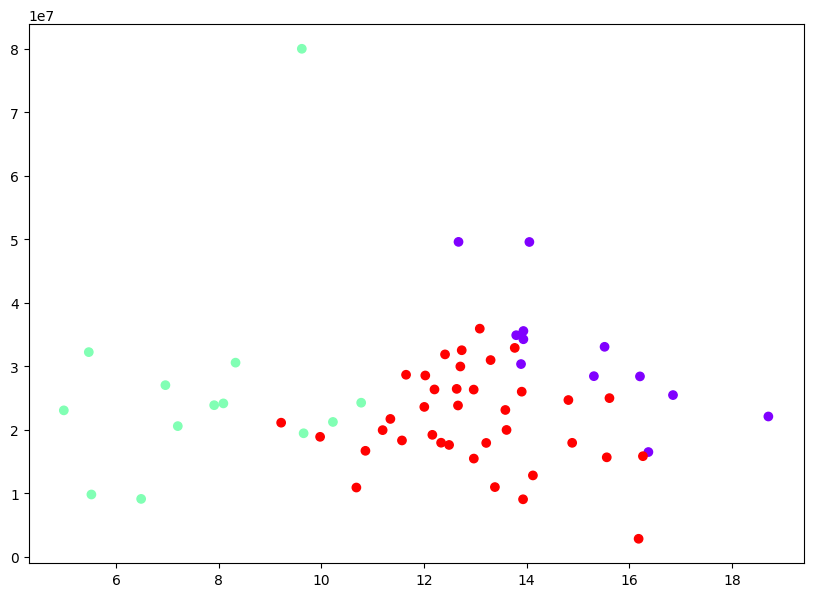

In [7]:
bank_cluster = KMeans(n_clusters=3,random_state=34)
bank_df['bank_label'] = bank_cluster.fit_predict(bank_df_scaled)
bank_df[['bank_label']]
plt.figure(figsize=(10, 7))
plt.scatter(bank_df['loan_rate_mean'],bank_df['loan_limit_mean'],  c=bank_cluster.labels_, cmap='rainbow')

In [8]:
bank_df

,product_cnt,loan_limit_mean,loan_rate_mean,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max,bank_label
bank_id,,,,,,,,
1,2,2.358251e+07,12.006330,0.0,4.8,150000000.0,19.9,2
2,4,3.554132e+07,13.936920,5000000.0,9.9,60000000.0,19.9,0
3,3,1.647378e+07,16.371919,3000000.0,9.9,30000000.0,19.9,0
4,2,3.055527e+07,8.328992,1000000.0,3.6,270000000.0,15.0,1
5,1,3.185650e+07,12.410327,0.0,7.9,80000000.0,17.9,2
...,...,...,...,...,...,...,...,...
60,2,3.221524e+07,5.469902,1000000.0,3.5,200000000.0,9.8,1
61,2,2.994992e+07,12.708542,1000000.0,4.9,50000000.0,19.9,2
62,2,1.942956e+07,9.655174,0.0,6.7,50000000.0,14.9,1


## ALL

In [9]:
bank = all_df[['bank_id','product_id','loan_limit','loan_rate']]

pr_cnt = bank[['bank_id','product_id']].drop_duplicates()
pr_cnt = pr_cnt.groupby(['bank_id'],as_index=False).count()
pr_cnt.columns = ['bank_id','product_cnt']

loan_mean = bank.groupby(['bank_id'],as_index=False).mean() # 평균 사용
loan_mean = loan_mean[['bank_id','loan_limit','loan_rate']]
loan_mean.columns = ['bank_id','loan_limit_mean','loan_rate_mean']

loan_min = bank.groupby(['bank_id'],as_index=False).min()
loan_min = loan_min[['bank_id','loan_limit','loan_rate']]
loan_min.columns = ['bank_id','loan_limit_min','loan_rate_min']

loan_max = bank.groupby(['bank_id'],as_index=False).max()
loan_max = loan_max[['bank_id','loan_limit','loan_rate']]
loan_max.columns = ['bank_id','loan_limit_max','loan_rate_max']

bank_df = pd.merge(pr_cnt,loan_mean,'inner','bank_id')
bank_df = pd.merge(bank_df,loan_min,'inner','bank_id')
bank_df = pd.merge(bank_df,loan_max,'inner','bank_id')

bank_df = bank_df.set_index(['bank_id'])
bank_df

,product_cnt,loan_limit_mean,loan_rate_mean,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max
bank_id,,,,,,,
1,7,2.464846e+07,12.180480,0.0,4.8,150000000.0,19.9
2,4,3.406824e+07,13.963424,5000000.0,9.9,60000000.0,19.9
3,3,1.742893e+07,16.300256,3000000.0,9.9,50000000.0,19.9
4,2,3.102012e+07,8.388814,1000000.0,3.6,270000000.0,15.0
5,1,3.219119e+07,12.481397,0.0,7.9,80000000.0,17.9
...,...,...,...,...,...,...,...
60,2,3.211260e+07,5.563573,1000000.0,3.5,200000000.0,10.3
61,2,2.659711e+07,13.855057,1000000.0,4.9,50000000.0,19.9
62,2,1.807720e+07,9.653023,0.0,6.7,50000000.0,15.5


In [10]:
bank_df_scaled = bank_scaler.transform(bank_df)
bank_df_scaled

array([[4.61538462e-01, 2.82924345e-01, 5.24341625e-01, 0.00000000e+00,
        2.84482759e-01, 1.35202804e-02, 9.90196078e-01],
       [2.30769231e-01, 4.04956968e-01, 6.54237937e-01, 7.14285714e-02,
        7.24137931e-01, 4.50676014e-03, 9.90196078e-01],
       [1.53846154e-01, 1.89395720e-01, 8.24487737e-01, 4.28571429e-02,
        7.24137931e-01, 3.50525789e-03, 9.90196078e-01],
       [7.69230769e-02, 3.65468719e-01, 2.48099915e-01, 1.42857143e-02,
        1.81034483e-01, 2.55383075e-02, 5.09803922e-01],
       [0.00000000e+00, 3.80639867e-01, 5.46264868e-01, 0.00000000e+00,
        5.51724138e-01, 6.50976465e-03, 7.94117647e-01],
       [0.00000000e+00, 3.28791184e-01, 8.21933770e-01, 4.28571429e-02,
        1.00000000e+00, 3.50525789e-03, 8.43137255e-01],
       [7.69230769e-02, 3.01607238e-01, 6.14488510e-01, 1.42857143e-02,
        5.77586207e-01, 8.51276915e-03, 7.74509804e-01],
       [7.69230769e-02, 3.15753194e-01, 1.47837052e-01, 1.42857143e-02,
        1.55172414e-01, 1

In [11]:
bank_df['bank_label'] = bank_cluster.predict(bank_df_scaled)

In [12]:
bank_df

,product_cnt,loan_limit_mean,loan_rate_mean,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max,bank_label
bank_id,,,,,,,,
1,7,2.464846e+07,12.180480,0.0,4.8,150000000.0,19.9,2
2,4,3.406824e+07,13.963424,5000000.0,9.9,60000000.0,19.9,0
3,3,1.742893e+07,16.300256,3000000.0,9.9,50000000.0,19.9,0
4,2,3.102012e+07,8.388814,1000000.0,3.6,270000000.0,15.0,1
5,1,3.219119e+07,12.481397,0.0,7.9,80000000.0,17.9,2
...,...,...,...,...,...,...,...,...
60,2,3.211260e+07,5.563573,1000000.0,3.5,200000000.0,10.3,1
61,2,2.659711e+07,13.855057,1000000.0,4.9,50000000.0,19.9,2
62,2,1.807720e+07,9.653023,0.0,6.7,50000000.0,15.5,1


# Product ID

In [13]:
product = train[['product_id','loan_limit','loan_rate']]
min_df = product.groupby(['product_id'],as_index=False).min()
max_df = product.groupby(['product_id'],as_index=False).max()
mean_df = product.groupby(['product_id'],as_index=False).mean()

min_df.columns = ['product_id','loan_limit_min','loan_rate_min']
max_df.columns = ['product_id','loan_limit_max','loan_rate_max']
mean_df.columns = ['product_id','loan_limit_mean','loan_rate_mean']

product_df = pd.merge(min_df,max_df,'inner','product_id')
product_df = pd.merge(product_df,mean_df,'inner','product_id')

product_df = pd.merge(min_df,max_df,'inner','product_id')
product_df = pd.merge(product_df,mean_df,'inner','product_id')

product_df = product_df.set_index('product_id')

In [14]:
product_df

,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max,loan_limit_mean,loan_rate_mean
product_id,,,,,,
1,0.0,4.8,150000000.0,16.9,2.421815e+07,10.496421
5,1000000.0,1.5,45000000.0,19.9,1.582066e+07,16.265664
7,5000000.0,9.9,60000000.0,19.9,3.563953e+07,13.884407
8,1000000.0,5.9,70000000.0,16.9,1.857084e+07,14.178455
12,2000000.0,7.9,50000000.0,19.9,2.009321e+07,13.127137
...,...,...,...,...,...,...
265,3000000.0,5.0,100000000.0,13.3,2.480337e+07,7.866320
266,1000000.0,9.9,60000000.0,19.9,2.034246e+07,11.932882
267,1000000.0,5.9,150000000.0,19.9,3.122393e+07,12.472661


In [15]:
product_scaler = MinMaxScaler()
product_df_scaled = product_scaler.fit_transform(product_df)
product_df_scaled

array([[0.        , 0.22758621, 0.01470441, 0.78767123, 0.06272106,
        0.41439124],
       [0.01428571, 0.        , 0.00420126, 0.99315068, 0.03869668,
        0.77999015],
       [0.07142857, 0.57931034, 0.00570171, 0.99315068, 0.09539649,
        0.62908908],
       ...,
       [0.01428571, 0.30344828, 0.01470441, 0.99315068, 0.08276391,
        0.53962627],
       [0.01428571, 0.14482759, 0.02670801, 0.65753425, 0.0699884 ,
        0.28213783],
       [0.01428571, 0.12413793, 0.01470441, 0.64383562, 0.07578978,
        0.16146533]])

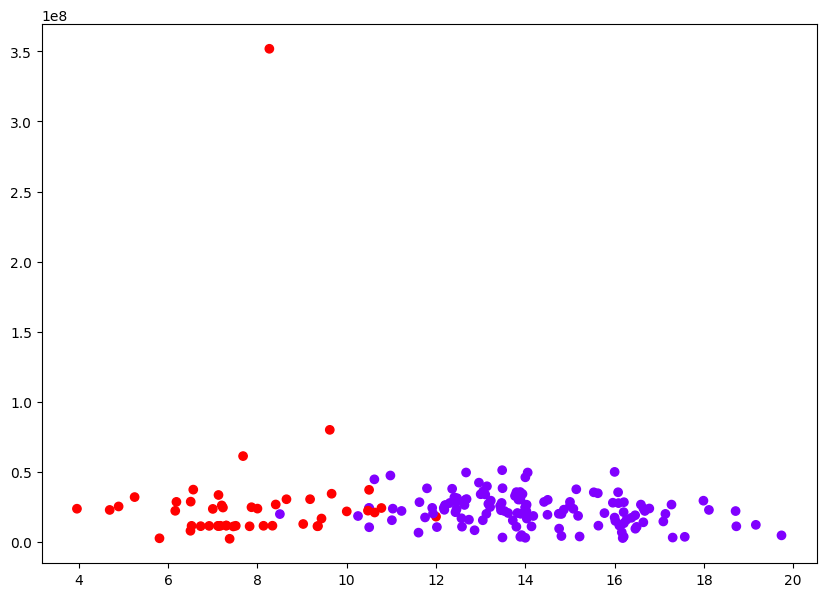

In [16]:
# 최종 결정
product_cluster = KMeans(n_clusters=2)
product_df['product_label'] = product_cluster.fit_predict(product_df_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(product_df['loan_rate_mean'],product_df['loan_limit_mean'],  c=product_cluster.labels_, cmap='rainbow')

In [17]:
product_df

,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max,loan_limit_mean,loan_rate_mean,product_label
product_id,,,,,,,
1,0.0,4.8,150000000.0,16.9,2.421815e+07,10.496421,0
5,1000000.0,1.5,45000000.0,19.9,1.582066e+07,16.265664,0
7,5000000.0,9.9,60000000.0,19.9,3.563953e+07,13.884407,0
8,1000000.0,5.9,70000000.0,16.9,1.857084e+07,14.178455,0
12,2000000.0,7.9,50000000.0,19.9,2.009321e+07,13.127137,0
...,...,...,...,...,...,...,...
265,3000000.0,5.0,100000000.0,13.3,2.480337e+07,7.866320,1
266,1000000.0,9.9,60000000.0,19.9,2.034246e+07,11.932882,0
267,1000000.0,5.9,150000000.0,19.9,3.122393e+07,12.472661,0


## ALL

In [18]:
product = all_df[['product_id','loan_limit','loan_rate']]
min_df = product.groupby(['product_id'],as_index=False).min()
max_df = product.groupby(['product_id'],as_index=False).max()
mean_df = product.groupby(['product_id'],as_index=False).mean()

min_df.columns = ['product_id','loan_limit_min','loan_rate_min']
max_df.columns = ['product_id','loan_limit_max','loan_rate_max']
mean_df.columns = ['product_id','loan_limit_mean','loan_rate_mean']

product_df = pd.merge(min_df,max_df,'inner','product_id')
product_df = pd.merge(product_df,mean_df,'inner','product_id')

product_df = pd.merge(min_df,max_df,'inner','product_id')
product_df = pd.merge(product_df,mean_df,'inner','product_id')

product_df = product_df.set_index('product_id')

In [19]:
product_df

,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max,loan_limit_mean,loan_rate_mean
product_id,,,,,,
1,0.0,4.8,150000000.0,16.9,2.608910e+07,10.687069
4,24648461.0,12.0,24648461.0,12.0,2.464846e+07,12.000000
5,1000000.0,1.5,45000000.0,19.9,1.588165e+07,16.255103
7,5000000.0,9.9,60000000.0,19.9,3.408915e+07,13.937167
8,1000000.0,5.9,70000000.0,16.9,1.897920e+07,13.781068
...,...,...,...,...,...,...
265,3000000.0,5.0,100000000.0,13.6,2.495949e+07,7.938752
266,1000000.0,9.9,60000000.0,19.9,2.034235e+07,11.932923
267,1000000.0,5.9,150000000.0,19.9,3.089417e+07,12.473860


In [20]:
product_df_scaled = product_scaler.transform(product_df)
product_df_scaled

array([[0.        , 0.22758621, 0.01470441, 0.78767123, 0.06807367,
        0.42647268],
       [0.35212087, 0.72413793, 0.0021655 , 0.45205479, 0.06395214,
        0.50967356],
       [0.01428571, 0.        , 0.00420126, 0.99315068, 0.03887117,
        0.7793209 ],
       ...,
       [0.01428571, 0.30344828, 0.01470441, 0.99315068, 0.08182051,
        0.53970223],
       [0.01428571, 0.14482759, 0.02670801, 0.65753425, 0.07013263,
        0.28629762],
       [0.01428571, 0.12413793, 0.01470441, 0.64383562, 0.07694056,
        0.1468844 ]])

In [21]:
product_df['product_label'] = product_cluster.predict(product_df_scaled)

In [22]:
product_df

,loan_limit_min,loan_rate_min,loan_limit_max,loan_rate_max,loan_limit_mean,loan_rate_mean,product_label
product_id,,,,,,,
1,0.0,4.8,150000000.0,16.9,2.608910e+07,10.687069,0
4,24648461.0,12.0,24648461.0,12.0,2.464846e+07,12.000000,1
5,1000000.0,1.5,45000000.0,19.9,1.588165e+07,16.255103,0
7,5000000.0,9.9,60000000.0,19.9,3.408915e+07,13.937167,0
8,1000000.0,5.9,70000000.0,16.9,1.897920e+07,13.781068,0
...,...,...,...,...,...,...,...
265,3000000.0,5.0,100000000.0,13.6,2.495949e+07,7.938752,1
266,1000000.0,9.9,60000000.0,19.9,2.034235e+07,11.932923,0
267,1000000.0,5.9,150000000.0,19.9,3.089417e+07,12.473860,0


# Data Structure

In [23]:
bank_df.reset_index(inplace=True)
product_df.reset_index(inplace=True)

In [24]:
bank_df.isna().sum()

bank_id            0
product_cnt        0
loan_limit_mean    0
loan_rate_mean     0
loan_limit_min     0
loan_rate_min      0
loan_limit_max     0
loan_rate_max      0
bank_label         0
dtype: int64

In [25]:
product_df.isna().sum()

product_id         0
loan_limit_min     0
loan_rate_min      0
loan_limit_max     0
loan_rate_max      0
loan_limit_mean    0
loan_rate_mean     0
product_label      0
dtype: int64

# Deployment CSV

In [26]:
bank_df.to_csv('../Data/bank_df.csv',index=False)
product_df.to_csv('../Data/product_df.csv',index=False)